# <center>*IMPACT PROJECT - GESTAMP*</center> 
## <center>Defect Detection using Machine Learning</center> 
### <center>Multiclass Oversampling-SMOTE</center>
_____

<img 
    src="https://www.gestamp.com/getattachment/c8d61c0f-e752-4156-8002-97e21ab43a3f/Imag2-2" width="2400" height="1000" align="center"/>

___

## <center>*Table of Contents*</center>
1. [Final Dataset Preparation](#1)
2. [Random Forest](#2)
    * 2.1. [Training](#2.1)
    * 2.2. [Evaluation](#2.2)
    * 2.3. [Confusion Matrix](#2.3)
    * 2.4. [Classification Report](#2.4)
    * 2.5. [Feature Importance](#2.5)
3. [KNN](#3)
    * 3.1. [Training](#3.1)
    * 3.2. [Evaluation](#3.2)
    * 3.3. [Confusion Matrix](#3.3)
    * 3.4. [Classification Report](#3.4)
4. [XGBoost](#4)
    * 4.1. [Training](#4.1)
    * 4.2. [Evaluation](#4.2)
    * 4.3. [Confusion Matrix](#4.3)
    * 4.4. [Classification Report](#4.4)
    * 4.5. [Feature Importance](#4.5)
5. [Extra Trees](#5)
    * 5.1. [Training](#5.1)
    * 5.2. [Evaluation](#5.2)
    * 5.3. [Confusion Matrix](#5.3)
    * 5.4. [Classification Report](#5.4)
    * 5.5. [Feature Importance](#5.5)
6. [Voting Classifier](#6)
    * 6.1. [Training](#6.1)
    * 6.2. [Evaluation](#6.2)
    * 6.3. [Confusion Matrix](#6.3)
    * 6.4. [Classification Report](#6.4)


## Final Dataset Preparation <a id='1'></a>

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

Dataset used for this analysis gotten from EDA notebooks, dataset with `Iterative Imputer` + `Standard Scaling`

In [2]:
# Import csv
final_df = pd.read_csv('final_df_2.csv')

In [3]:
# Verify Original Defect Classes
final_df['Defect'].value_counts()

0                      118493
0                       24940
marks/contamination        86
deformation                66
marks                      35
thinning                   33
waves                      23
meterial failure           22
cracks                     20
scratch                     4
dent                        2
Name: Defect, dtype: int64

In [4]:
# Standardize Defect Classes
final_df['Defect'] = final_df['Defect'].replace(0 , '0')

In [5]:
final_df['Defect'].value_counts()

0                      143433
marks/contamination        86
deformation                66
marks                      35
thinning                   33
waves                      23
meterial failure           22
cracks                     20
scratch                     4
dent                        2
Name: Defect, dtype: int64

In [6]:
final_df['Defect'].value_counts()

0                      143433
marks/contamination        86
deformation                66
marks                      35
thinning                   33
waves                      23
meterial failure           22
cracks                     20
scratch                     4
dent                        2
Name: Defect, dtype: int64

In [7]:
# Define the mapping for grouping the defects
defect_mapping = {
    'deformation': 2,
    'thinning': 2,
    'meterial failure': 2,
    'marks': 1,
    'marks/contamination': 1,
    'scratch': 1,
    'dent': 1,
    'cracks': 3,
    'waves': 3,
    '0': 0
}
# Create a new column 'Defect_Group' based on the mapping
final_df['Defect_Group'] = final_df['Defect'].replace(defect_mapping)

# Drop the original 'Defects' column if desired
final_df.drop(['Defect', 'Unnamed: 0', 'TraceabilityCode'], axis=1, inplace=True)

In [8]:
final_df['Defect_Group'].value_counts()

0    143433
1       127
2       121
3        43
Name: Defect_Group, dtype: int64

In [9]:
# Defining X and y
X = final_df.drop('Defect_Group', axis=1)
y = final_df['Defect_Group']


In [10]:
# split
X_train1, X_test, y_train1, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.7,  
                                                    stratify=y)

# Apply SMOTE on the training set only
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train1, y_train1)

## Random Forest<a id='2'></a>

### Random Forest Training <a id='2.1'></a>

In [11]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(max_depth= 9, 
                                 max_features= None, 
                                 min_samples_leaf= 1, 
                                 min_samples_split= 2, 
                                 n_estimators= 50)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, max_features=None, n_estimators=50)

### Random Forest Evaluation <a id='2.2'></a>

In [12]:
# Make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print("Training Accuracy score:", train_acc_rf)
print("Test Accuracy score:", test_acc_rf)

Training Accuracy score: 0.9548913368259596
Test Accuracy score: 0.8924579062108632


### Random Forest Confusion Matrix <a id='2.3'></a>

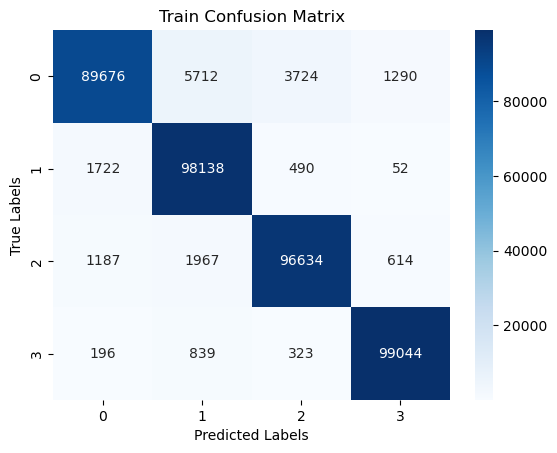

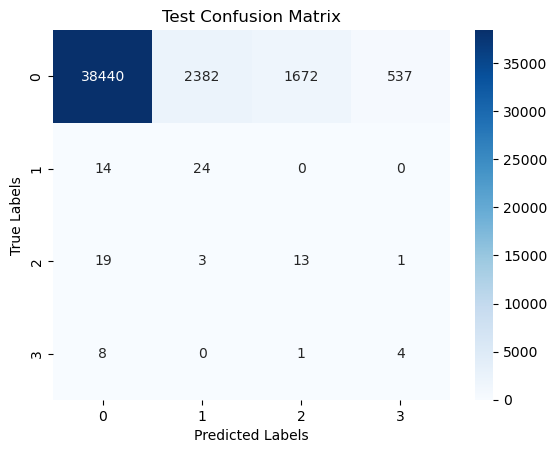

In [13]:
# Plot Confusion Matrix

cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

sns.heatmap(cm_train_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

sns.heatmap(cm_test_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Random Forest Classification Report <a id='2.4'></a>

In [14]:
# Classification Report
report = classification_report(y_test, y_test_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     43031
           1       0.01      0.63      0.02        38
           2       0.01      0.36      0.02        36
           3       0.01      0.31      0.01        13

    accuracy                           0.89     43118
   macro avg       0.26      0.55      0.25     43118
weighted avg       1.00      0.89      0.94     43118



### Random Forest Feature Importance <a id='2.5'></a>

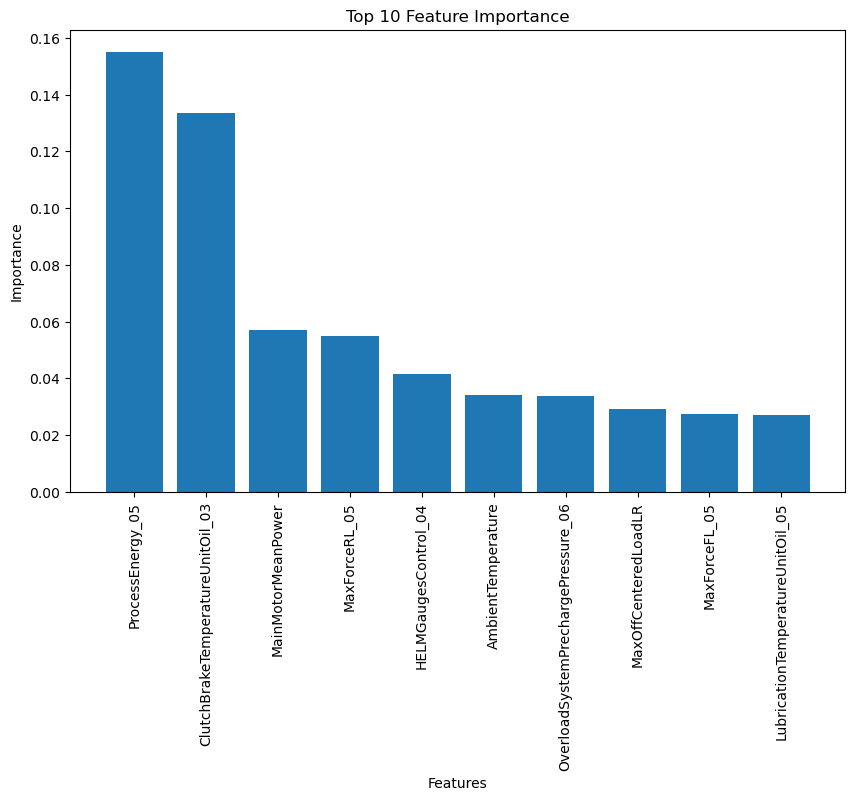

In [15]:
# Plotting Feature Importance
feature_importance = rf_model.feature_importances_
features = X_train.columns

# Sort the feature importance in descending order
indices = np.argsort(feature_importance)[::-1]

# Select the top 10 features
top_features = features[indices][:10]
top_importance = feature_importance[indices][:10]

plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importance)
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

## K Nearest Neighbors <a id='3'></a>

### KNN Training <a id='3.1'></a>

In [16]:
# create a KNN Classifier
knn_model = KNeighborsClassifier(algorithm= 'auto', 
                                 n_neighbors= 7, 
                                 weights= 'distance')

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

### KNN Evaluation <a id='3.2'></a>

In [17]:
# Make predictions on the training set
y_train_pred_knn = knn_model.predict(X_train)
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)

# Make predictions on the test set
y_test_pred_knn = knn_model.predict(X_test)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

print("Training Accuracy score:", train_acc_knn)
print("Test Accuracy score:", test_acc_knn)

KeyboardInterrupt: 

### KNN Confusion Matrix <a id='3.3'></a>

In [ ]:
# Plot Confusion Matrix

cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)

sns.heatmap(cm_train_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

sns.heatmap(cm_test_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### KNN Classification Report <a id='3.4'></a>

In [ ]:
# Classification Report
report = classification_report(y_test, y_test_pred_knn)
print(report)

## XGBoost <a id='4'></a>

### XGBoost Training <a id='4.1'></a>

In [18]:
# create an XGB Classifier
xgb_model = XGBClassifier(n_estimators= 100,
                          max_depth= 9,
                          learning_rate= 0.1,
                          subsample= 0.8,
                          colsample_bytree= 1)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### XGBoost Evaluation <a id='4.2'></a>

In [19]:
# Make predictions on the training set
y_train_pred_xgb = xgb_model.predict(X_train)
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)

# Make predictions on the test set
y_test_pred_xgb = xgb_model.predict(X_test)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("Training Accuracy score:", train_acc_xgb)
print("Test Accuracy score:", test_acc_xgb)

Training Accuracy score: 0.9999751000976076
Test Accuracy score: 0.9966835196437682


### XGB Confusion Matrix<a id='4.3'></a>

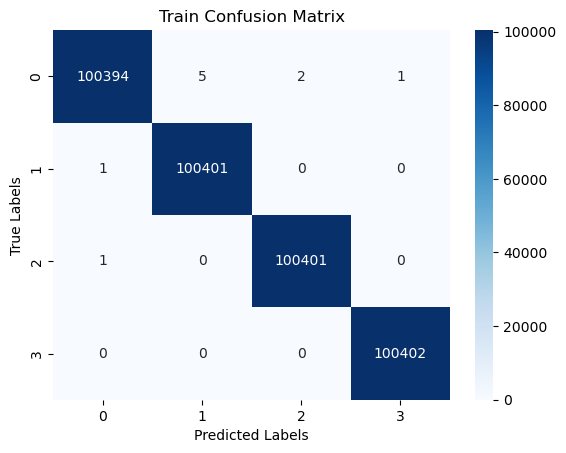

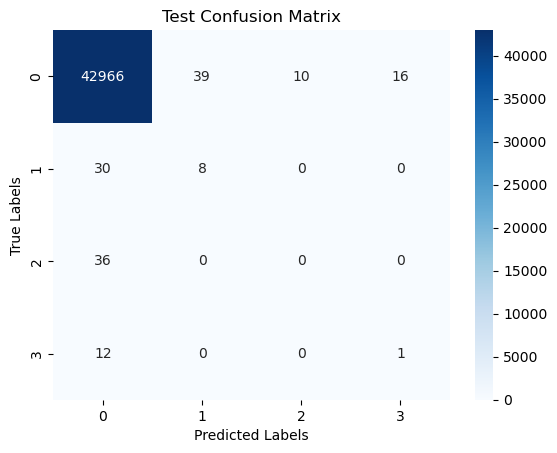

In [20]:
# Plot Confusion Matrix

cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

sns.heatmap(cm_train_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

sns.heatmap(cm_test_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### XGB Classification Report <a id='4.4'></a>

In [21]:
# Classification Report
report = classification_report(y_test, y_test_pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43031
           1       0.17      0.21      0.19        38
           2       0.00      0.00      0.00        36
           3       0.06      0.08      0.07        13

    accuracy                           1.00     43118
   macro avg       0.31      0.32      0.31     43118
weighted avg       1.00      1.00      1.00     43118



### XGB Feature Importance <a id='4.5'></a>

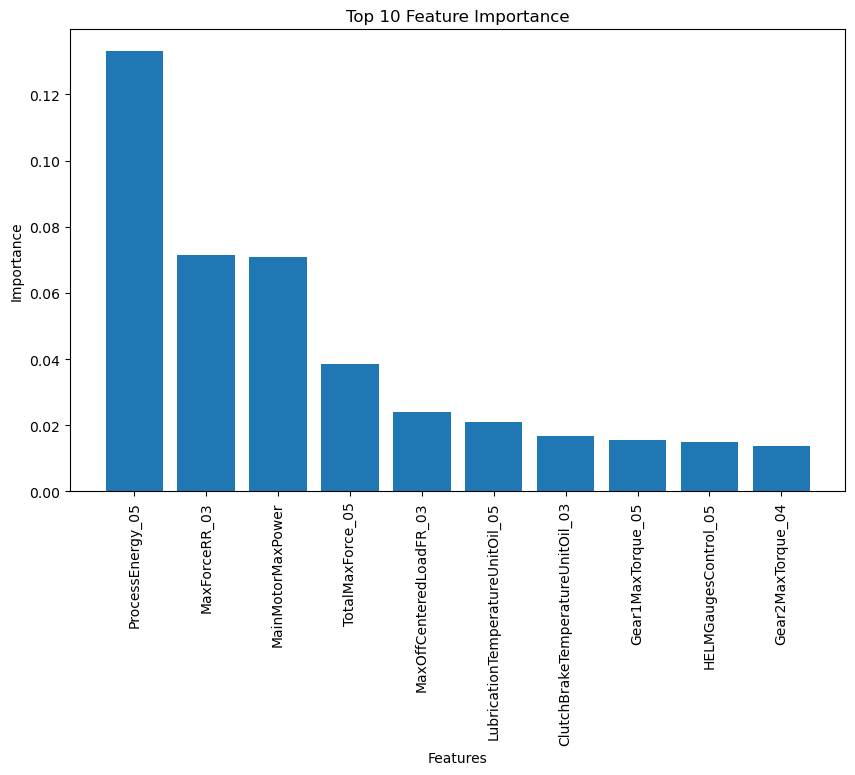

In [22]:
# Plotting Feature Importance
feature_importance = xgb_model.feature_importances_
features = X_train.columns

# Sort the feature importance in descending order
indices = np.argsort(feature_importance)[::-1]

# Select the top 10 features
top_features = features[indices][:10]
top_importance = feature_importance[indices][:10]

plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importance)
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

## Extra Trees Classifier <a id='5'></a>

### Extra Trees Training <a id='5.1'></a>

In [23]:
# Create Extra Trees Classifier

et_model = ExtraTreesClassifier(max_depth= 9, 
                                max_features= 'sqrt', 
                                min_samples_leaf= 1, 
                                min_samples_split= 2, 
                                n_estimators= 100)

et_model.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=9, max_features='sqrt')

### Extra Trees Evaluation <a id='5.2'></a>

In [24]:
# Make predictions on the training set
y_train_pred_et = et_model.predict(X_train)
train_acc_et = accuracy_score(y_train, y_train_pred_et)

# Make predictions on the test set
y_test_pred_et = et_model.predict(X_test)
test_acc_et = accuracy_score(y_test, y_test_pred_et)

print("Training Accuracy score:", train_acc_et)
print("Test Accuracy score:", test_acc_et)

Training Accuracy score: 0.918589769128105
Test Accuracy score: 0.7933345702490839


### ET Confusion Matrix <a id='5.3'></a>

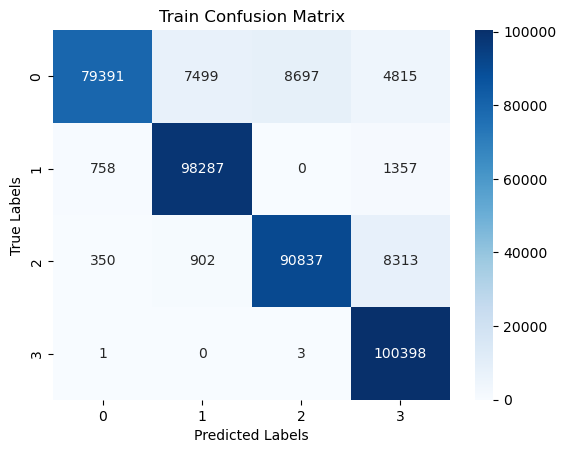

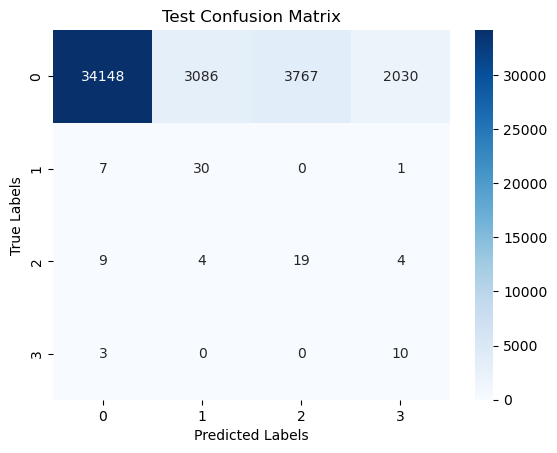

In [25]:
# Plot Confusion Matrix

cm_train_et = confusion_matrix(y_train, y_train_pred_et)
cm_test_et = confusion_matrix(y_test, y_test_pred_et)

sns.heatmap(cm_train_et, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

sns.heatmap(cm_test_et, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### ET Classification Report <a id='5.4'></a>

In [26]:
# Classification Report
report = classification_report(y_test, y_test_pred_et)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     43031
           1       0.01      0.79      0.02        38
           2       0.01      0.53      0.01        36
           3       0.00      0.77      0.01        13

    accuracy                           0.79     43118
   macro avg       0.25      0.72      0.23     43118
weighted avg       1.00      0.79      0.88     43118



### ET Feature Importance <a id='5.5'></a>

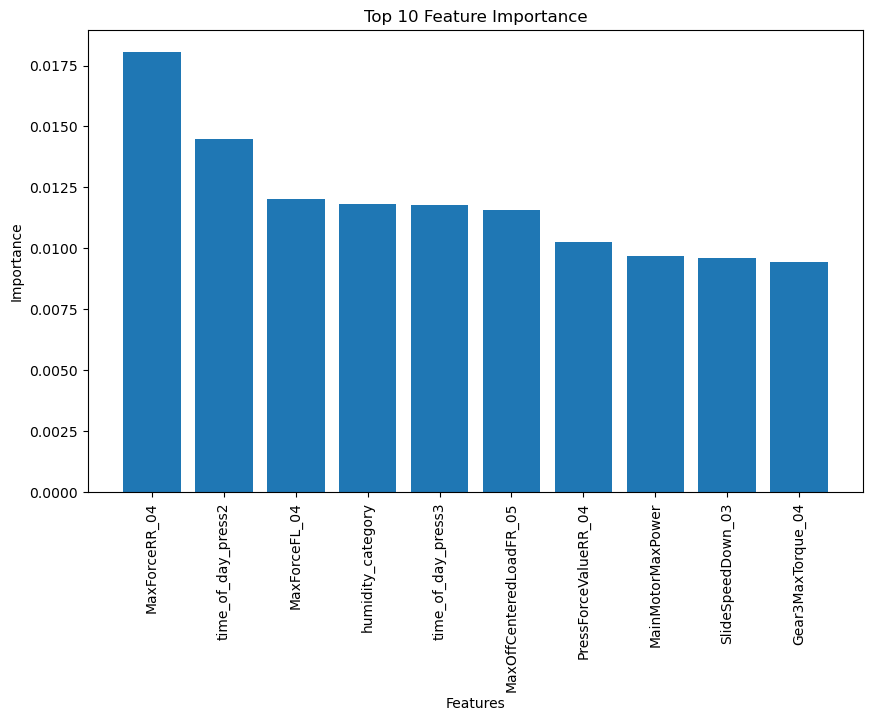

In [27]:
# Plotting Feature Importance
feature_importance = et_model.feature_importances_
features = X_train.columns

# Sort the feature importance in descending order
indices = np.argsort(feature_importance)[::-1]

# Select the top 10 features
top_features = features[indices][:10]
top_importance = feature_importance[indices][:10]

plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importance)
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

## Voting Classifier <a id='6'></a>

### Voting Classifier Training <a id='6.1'></a>

In [28]:
# Create the VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[ ('rf', rf_model), ('et', et_model)],
    voting='hard'  # Use 'soft' for soft voting
)

# Train the VotingClassifier
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=9,
                                                     max_features=None,
                                                     n_estimators=50)),
                             ('et',
                              ExtraTreesClassifier(max_depth=9,
                                                   max_features='sqrt'))])

### Voting Classifier Evaluation <a id='6.2'></a>

In [29]:
# Make predictions using the VotingClassifier
y_train_pred_voting = voting_classifier.predict(X_train)
y_test_pred_voting = voting_classifier.predict(X_test)

train_acc_voting = accuracy_score(y_train, y_train_pred_voting)
test_acc_voting = accuracy_score(y_test, y_test_pred_voting)
print("Training Accuracy score:", train_acc_voting)
print("Test Accuracy score:", test_acc_voting)

Training Accuracy score: 0.9604689149618534
Test Accuracy score: 0.9160675355999814


### Voting Classifier Confusion Matrix <a id='6.3'></a>

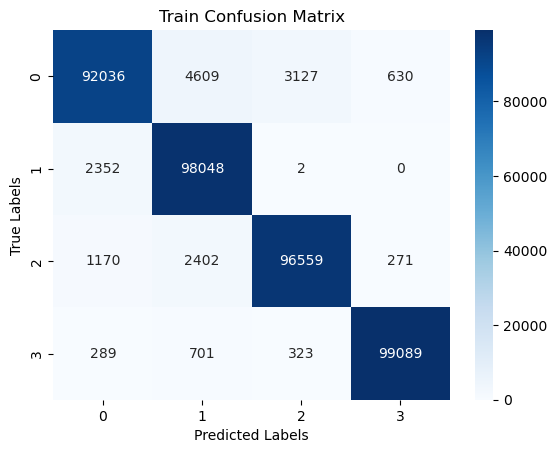

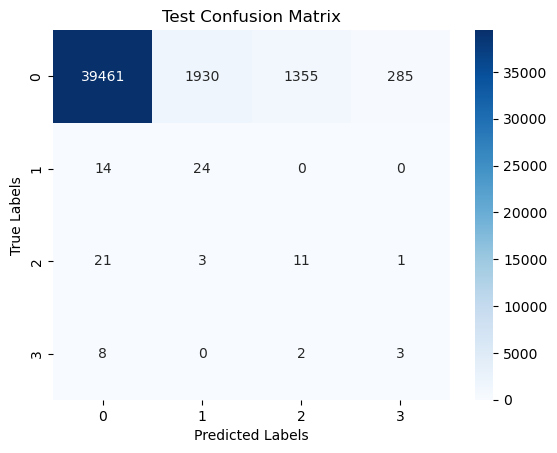

In [30]:
# Plot Confusion Matrix

cm_train_voting = confusion_matrix(y_train, y_train_pred_voting)
cm_test_voting = confusion_matrix(y_test, y_test_pred_voting)

sns.heatmap(cm_train_voting, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

sns.heatmap(cm_test_voting, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Voting Classifier Classification Report <a id='6.4'></a>

In [31]:
# Classification Report
report = classification_report(y_test, y_test_pred_voting)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     43031
           1       0.01      0.63      0.02        38
           2       0.01      0.31      0.02        36
           3       0.01      0.23      0.02        13

    accuracy                           0.92     43118
   macro avg       0.26      0.52      0.25     43118
weighted avg       1.00      0.92      0.95     43118

